# Scatter plots
Using `stackview.scatterplot` we can visualize contents of pandas DataFrames. In such a plot you can select objects and visualize the selection. This might be useful for exploring feature extraction parameter spaces.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from skimage.measure import regionprops_table
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label
import matplotlib.pyplot as plt

import stackview
stackview.__version__

'0.11.2'

To demonstrate this, we need an image, a segmentation and a table of extracted features.

In [3]:
image = imread('data/blobs.tif')

# segment image
thresh = threshold_otsu(image)
binary_image = image > thresh
labeled_image = label(binary_image)

In [4]:
properties = regionprops_table(labeled_image, properties=['centroid', 'area', 'feret_diameter_max', 'minor_axis_length', 'major_axis_length'])

df = pd.DataFrame(properties)
df["aspect_ratio"] = df['major_axis_length'] / df['minor_axis_length']

num_objects = df.shape[0]
pre_selection = np.zeros(num_objects)
pre_selection[:int(num_objects/2)] = 1

pre_selection2 = np.zeros(num_objects)
pre_selection2[::2] = 1

df["selection"] = pre_selection

df.head(6)

,centroid-0,centroid-1,area,feret_diameter_max,minor_axis_length,major_axis_length,aspect_ratio,selection
0,13.212471,19.986143,433.0,36.055513,16.819060,34.957399,2.078439,1.0
1,4.270270,62.945946,185.0,21.377558,11.803854,21.061417,1.784283,1.0
2,12.568389,108.329787,658.0,32.449961,28.278264,30.212552,1.068402,1.0
3,9.806452,154.520737,434.0,26.925824,23.064079,24.535398,1.063793,1.0
4,13.545073,246.809224,477.0,31.384710,19.833058,31.162612,1.571246,1.0
5,15.757895,197.210526,285.0,21.840330,17.770536,20.506730,1.153974,1.0


## Drawing an interactive scatter plot
Next we draw a scatter plot of area versus Feret's diameter. You can select the axes which are plotted and the plot will change. You can also use a lasso-tool to select data points.

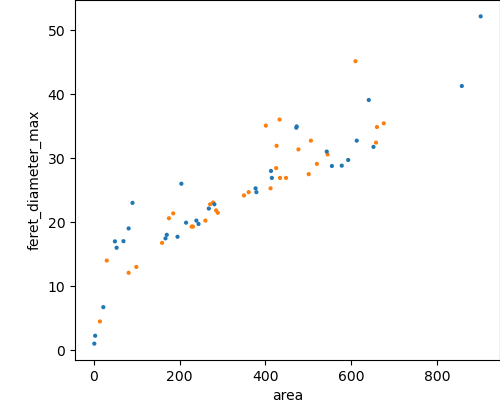

In [5]:
stackview.plot(df, 'area', 'feret_diameter_max', "selection", figsize=(5,4))

Next we take the selection from the dataframe and visualize this as an image.

StackViewNDArray([[0, 0, 0, ..., 2, 2, 2],
                  [0, 0, 0, ..., 2, 2, 2],
                  [0, 0, 0, ..., 2, 2, 2],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
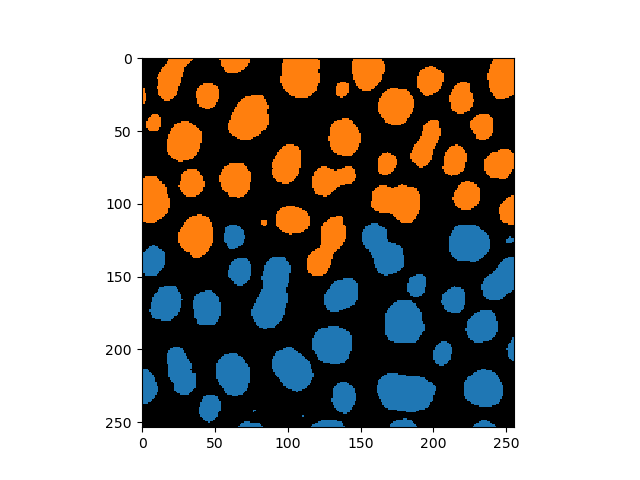

In [5]:
selection = df["selection"].tolist()

selected_image = np.take(np.asarray([-1] + list(selection)) * 1 + 1, labeled_image).astype(np.uint32)

stackview.insight(selected_image)

## Interaction
Using some more involved code we can also draw the image and the scatter plot side-by-side and make them interact. You can select data points in the plot on the right and the visualization on the left will be updated accordingly.

In [6]:
stackview.clusterplot(image=image,
                     labels=labeled_image,
                     df=df,
                     column_x="area",
                     column_y="aspect_ratio", 
                     zoom_factor=1.6,
                     alpha=0.7)

Every time the user selects different data points, the selection in our dataframe is update

In [7]:
df["selection"]

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
59    0.0
60    0.0
61    0.0
62    0.0
63    0.0
Name: selection, Length: 64, dtype: float64

## Custom widgets
You can also build such a side-by-side view with  two plots yourself:

In [10]:
import ipywidgets as widgets
from ipywidgets import HBox

# Program functions that are executed when the selection is changed.
def update2(e=None):
    widget2.update()

def update1(e=None):
    widget1.update()
    
widget1 = stackview.scatterplot(df, column_x="centroid-0", column_y="centroid-1", selection_changed_callback=update2, markersize=50)
widget2 = stackview.scatterplot(df, column_x="area", column_y="aspect_ratio", selection_changed_callback=update1)

# Arrange the widgets side by side using HBox
HBox([widget1, widget2])
